# Aufgabe5 – Interpretation von Modellen

## Notebook Beschreibung
...

## Bibliotheken importieren und Notebook setup

In [92]:
# Modul Pfad setzen
import sys
sys.path.append('./module')


# Bibliotheken importieren
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#pd.set_option('display.float_format', '{:.4f}'.format)
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score


## Analyse und Datenvorverarbeitung

Aufgabe 5a)  
Lesen Sie den Datensatz Hdma.csv ein und machen Sie sich mit den Daten vertraut.

In [2]:
# Load Dataset from csv (use ; as separator)
data = pd.read_csv('./data/Hdma.csv', sep=';')
# Display first line to test if data was loaded correctly
data.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [3]:
# Show dataframe size
data.shape

(2381, 13)

Der Datensatz besteht aus 2381 Datenpunkten mit jeweils 13 Merkmalen

In [4]:
data.isnull().any()

dir       False
hir       False
lvr       False
ccs       False
mcs       False
pbcr       True
dmi       False
self       True
single    False
uria      False
condo     False
black     False
deny      False
dtype: bool

Die Spalten "pbcr" und "self" enthalten fehlende Daten.

In [5]:
data[data.isnull().any(axis=1)]

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,black,deny
2380,0.330814,0.255346,0.700783,2.116387,1.721008,NaN,no,NaN,yes,3.774496,0,no,no


Nur in einer Zeile ist "pbcr" und "self" gleich NaN. Da es nur eine einzige Zeile mit fehlenden Daten gibt, haben wir uns entschieden diese aus dem Datensatz zu entfernen.

In [6]:
data = data.drop(2380)
data.shape

(2380, 13)

### Art der Merkmale 

In [7]:
data.columns

Index(['dir', 'hir', 'lvr', 'ccs', 'mcs', 'pbcr', 'dmi', 'self', 'single',
       'uria', 'condo', 'black', 'deny'],
      dtype='object')

- `dir` numerisch-kontinuierlich 
- `hir` numerisch-kontinuierlich
- `lvr` numerisch-kontinuierlich
- `ccs` kategorisch-ordinal
- `mcs` kategorisch-ordinal
- `pbcr` kategorisch-nominal
- `dmi` kategorisch-nominal
- `self` kategorisch-nominal
- `single` kategorisch-nominal
- `uria` numerisch-kontinuierlich
- `condo` kategorisch-nominal
- `black` kategorisch-nominal
- `deny` kategorisch-nominal


Die Zielvariable der Klassifikation ist 'deny' welche angibt ob der Kreditantrag abgelehnt wurde. Es soll bestimmt werden welche Merkmale besonderen Einfluss auf diese haben. Im Speziellen soll bestimmt werden, ob es eine rassistische Diskriminierung gibt. Dafür muss das Merkmal 'black' betrachtet werden

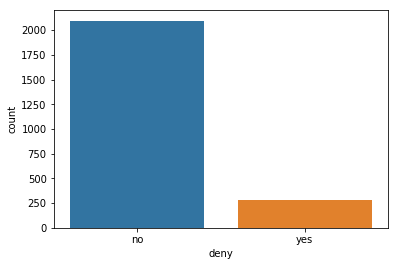

In [8]:
sns.countplot(x='deny',data=data)
plt.show()

In [9]:
nominal_features = ['pbcr', 'dmi', 'self', 'single', 'condo', 'black', 'deny']
labelencoder = LabelEncoder()
data[nominal_features] = data[nominal_features].apply(labelencoder.fit_transform)
data.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,black,deny
0,0.221,0.221,0.800000,5.0,2.0,0,0,0,0,3.9,0,0,0
1,0.265,0.265,0.921875,2.0,2.0,0,0,0,1,3.2,0,0,0
2,0.372,0.248,0.920398,1.0,2.0,0,0,0,0,3.2,0,0,0
3,0.320,0.250,0.860465,1.0,2.0,0,0,0,0,4.3,0,0,0
4,0.360,0.350,0.600000,1.0,1.0,0,0,0,0,3.2,0,0,0


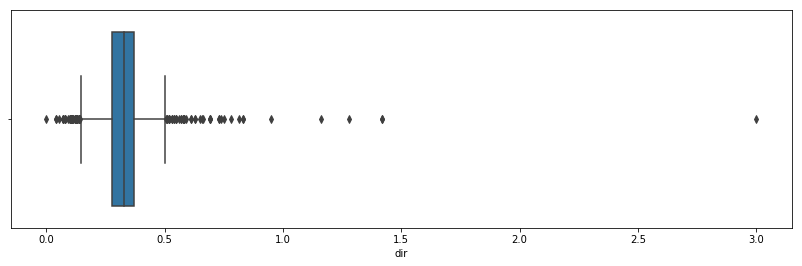

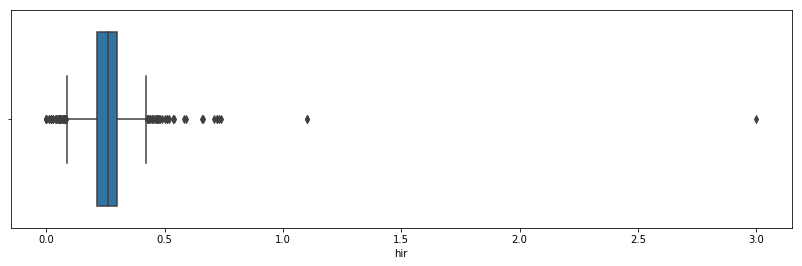

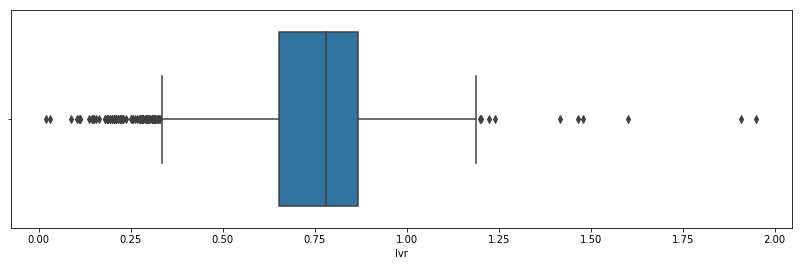

In [10]:
continuous_features = ['dir', 'hir', 'lvr']
for feature in continuous_features:
    plt.figure(figsize=(14, 4))
    sns.boxplot(data[feature])
    plt.show()

In [11]:
outliers = data[data["dir"]>2]
outliers.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,condo,black,deny
1094,3.0,3.0,0.571429,1.0,3.0,0,0,1,0,10.6,0,0,1


In [12]:
data.drop(outliers.index, inplace=True)
data.shape

(2379, 13)

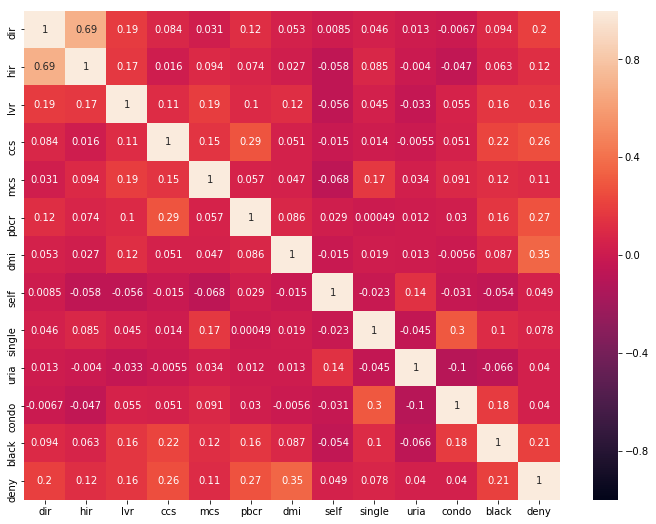

In [13]:
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmin=-1,vmax=1,annot=True)
plt.show()

In [102]:
# Create numpy arrays for features and target
X = data.drop(["deny","dir"], axis=1)
y = data["deny"]
# Create 80/20 train val split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# Print resulting dataset sizes
print("Shape X_train", X_train.shape)
print("Shape y_train", y_train.shape)
print("Shape X_test", X_test.shape)
print("Shape y_test", y_test.shape)

Shape X_train (1903, 11)
Shape y_train (1903,)
Shape X_test (476, 11)
Shape y_test (476,)


In [103]:
# Use StandardScaler to transform data to zero mean and unit variance
# scaler =  ColumnTransformer([
#     ('StandardScaler', StandardScaler(), ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria'])
# ], remainder='passthrough')
scaler = MinMaxScaler()
# Fit and transform on training data
X_train = scaler.fit_transform(X_train)
# Only apply transformation to test data
X_test = scaler.transform(X_test)

/Users/d062356/miniconda3/envs/smart-data-analytics/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [104]:
cls = LogisticRegression(solver="lbfgs")
cls.fit(X_train, y_train)
print(balanced_accuracy_score(y_train, cls.predict(X_train)))
print(balanced_accuracy_score(y_test, cls.predict(X_test)))
print(balanced_accuracy_score(y_train, np.zeros_like(y_train)))
print(balanced_accuracy_score(y_test, np.zeros_like(y_test)))
cls.coef_

0.6313481499824594
0.6226415094339622
0.5
0.5


array([[ 2.25831787,  2.13135286,  1.40984847,  0.57266222,  1.23778651,
         3.48121602,  0.56543795,  0.36895621,  0.68612872, -0.04948046,
         0.77097116]])

In [105]:
list(zip(data.columns.to_list(), cls.coef_.squeeze().tolist()))

[('dir', 2.2583178723821353),
 ('hir', 2.131352858145192),
 ('lvr', 1.4098484680063574),
 ('ccs', 0.5726622207836015),
 ('mcs', 1.2377865054283037),
 ('pbcr', 3.4812160169080433),
 ('dmi', 0.5654379543416987),
 ('self', 0.3689562124671439),
 ('single', 0.6861287204211991),
 ('uria', -0.04948046121857164),
 ('condo', 0.770971163331948)]

In [106]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
y = y_train.to_list()
X = pd.DataFrame(X_train, columns = data.drop("deny", axis=1).columns)
logistic_regression = smf.Logit(y, sm.add_constant(X))
result = logistic_regression.fit()
#print(result.predict(X_test).dtype)
#print(y_test.dtype)
#print(balanced_accuracy_score(y_test, result.predict(X_test).round()))
coef_table = result.summary2().tables[1]
coef_table = coef_table.round(4)
coef_table

ValueError: Shape of passed values is (1903, 11), indices imply (1903, 12)

In [97]:
coef_table[coef_table["P>|z|"] <= 0.05].sort_values("Coef.", ascending=False)

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
dir,6.1298,1.6368,3.7451,0.0002,2.9219,9.3378
self,4.2991,0.5673,7.5781,0.0000,3.1872,5.4110
lvr,4.0094,1.0717,3.7412,0.0002,1.9089,6.1099
ccs,1.4600,0.2201,6.6340,0.0000,1.0287,1.8913
dmi,1.2138,0.2249,5.3958,0.0000,0.7729,1.6546
pbcr,0.7699,0.3146,2.4471,0.0144,0.1533,1.3865
black,0.6939,0.2004,3.4616,0.0005,0.3010,1.0867
single,0.5647,0.2362,2.3914,0.0168,0.1019,1.0276
uria,0.3552,0.1736,2.0467,0.0407,0.0151,0.6954
const,-6.6960,0.5596,-11.9651,0.0000,-7.7928,-5.5991


In [ ]:
cls.coef_.squeeze().tolist()

In [ ]:
list(zip(data.columns.to_list(), cls.coef_.squeeze().tolist()))

In [ ]:
data.columns.to_list()